<a href="https://colab.research.google.com/github/YMGYM/google_colab_files/blob/master/Image_Text_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch 를 활용하여 모델을 import 합니다.

In [2]:
import torch
import torchvision.models as models # 임베딩 모델
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset

In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image

In [3]:
!unzip -q /content/drive/MyDrive/Datasets/flickr8k.zip -d data

In [4]:
imageModel = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

데이터 제너레이터를 생성합니다.

In [32]:
class CaptionDataset(Dataset):
  
    def __init__(self,root_dir,captions_file,transform=None,freq_threshold=5):
        self.root_dir = root_dir
        self.df = pd.read_csv(captions_file)
        self.transform = transform
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df["image"]
        self.captions = self.df["caption"]
        
        #Initialize vocabulary and build vocab -- 사용하지 않음
        # self.vocab = Vocabulary(freq_threshold)
        # self.vocab.build_vocab(self.captions.tolist())
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        caption = self.captions[idx]
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,img_name)
        img = Image.open(img_location).convert("RGB")
        
        #apply the transfromation to the image
        if self.transform is not None:
            img = self.transform(img)
        
        #numericalize the caption text
        # caption_vec = []
        # caption_vec += [self.vocab.stoi["<SOS>"]]
        # caption_vec += self.vocab.numericalize(caption)
        # caption_vec += [self.vocab.stoi["<EOS>"]]

        
        
        # return img, torch.tensor(caption_vec)

        return img, caption

In [ ]:
train_data = CaptionDataset('/content/data/Images', '/content/data/captions.txt', transform=transform)

In [ ]:
img, cap = train_data[0]

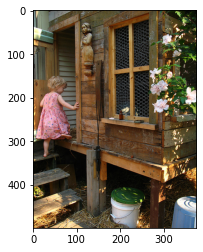

In [ ]:
import matplotlib.pyplot as plt

# img2 = img.reshape((500, 375, 3))
# img2.shape
plt.imshow(img)
plt.show()

In [ ]:
cap

'A child in a pink dress is climbing up a set of stairs in an entry way .'

# 할 일

- 캡션 토큰화
- 이미지를 RESNET에 입력

In [1]:
img = img.reshape(1,3, 500, 375)

NameError: ignored

In [ ]:
imageModel(img)

RuntimeError: ignored

# 카페 리뷰 태그 불러오기

In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image

In [4]:
review = pd.read_csv('/content/drive/MyDrive/Datasets/cafe_review_tag.csv', encoding='cp949')

In [5]:
review['review'].to_csv("review_corpus.csv")

# kor2vec 설치

In [6]:
!pip install git+https://github.com/naver/kor2vec.git

  Cloning https://github.com/naver/kor2vec.git to /tmp/pip-req-build-cp2d5s3s
  Running command git clone -q https://github.com/naver/kor2vec.git /tmp/pip-req-build-cp2d5s3s
  Created wheel for kor2vec: filename=kor2vec-1.0.1-cp37-none-any.whl size=21946 sha256=44309ec54cd12685e8242ad679c8da5909febf8df273104ea9114e4491d2a4f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-9lqo_o3c/wheels/b7/74/03/492f7af08e1f00c56765b0f6a25f28a086cc23db1827f269a4
Successfully built kor2vec


In [9]:
from kor2vec import Kor2Vec

kor2vec = Kor2Vec(embed_size=128)

kor2vec.train("review_corpus.csv", 'model.kor2vec', batch_size=128) # takes some time

kor2vec.save("embedding") # saving embedding

Corpus Sampling:  23%|██▎       | 4643/20005 [00:00<00:00, 46429.60it/s]

Reading Corpus lines


Corpus Sampling: 100%|██████████| 20005/20005 [00:00<00:00, 37945.75it/s]


Training kor2vec
Loading Word_sample corpus
Loading corpus finished
CUDA Available/count: True 1
training on  cuda:0


EP 1:   1%|          | 8/914 [00:00<00:11, 76.96it/s]

{'epoch': 0, 'train_ep_loss': 1.595841971346273}


EP 2:   1%|          | 8/914 [00:00<00:12, 73.77it/s]

{'epoch': 1, 'train_ep_loss': 1.305334508288611}


EP 3:   1%|          | 8/914 [00:00<00:12, 74.95it/s]

{'epoch': 2, 'train_ep_loss': 1.2467602218788614}


EP 4:   1%|          | 8/914 [00:00<00:12, 75.25it/s]

{'epoch': 3, 'train_ep_loss': 1.192922049330413}


EP 5:   1%|          | 8/914 [00:00<00:11, 79.76it/s]

{'epoch': 4, 'train_ep_loss': 1.1431204126230736}


EP 6:   1%|          | 8/914 [00:00<00:11, 79.95it/s]

{'epoch': 5, 'train_ep_loss': 1.100022419993674}


EP 7:   1%|          | 8/914 [00:00<00:11, 78.05it/s]

{'epoch': 6, 'train_ep_loss': 1.0633752367559095}


EP 8:   1%|          | 8/914 [00:00<00:11, 76.25it/s]

{'epoch': 7, 'train_ep_loss': 1.0306206237956783}


EP 9:   1%|          | 8/914 [00:00<00:11, 76.43it/s]

{'epoch': 8, 'train_ep_loss': 1.001009468894036}


EP 9: 100%|██████████| 914/914 [00:11<00:00, 76.51it/s]


{'epoch': 9, 'train_ep_loss': 0.9748260353404531}


In [10]:
from kor2vec import Kor2Vec
kor2vec = Kor2Vec.load("embedding")

kor2vec.embedding("안녕 아이오아이야 나는 클로바에서 왔어")

tensor([[-1.8976e-01,  8.2259e-01,  7.8040e-01, -1.2845e-01, -2.5340e-01,
         -1.2807e-01, -3.3295e-01,  9.4490e-01,  5.4653e-01,  2.3442e-01,
         -1.2598e-01, -3.5433e-01, -1.2234e-01,  6.3567e-01, -2.3481e-01,
         -4.0012e-02,  7.9953e-02,  8.6845e-02, -3.2234e-01, -2.5636e-01,
         -2.4414e-01, -2.0831e-01,  5.7045e-01, -1.1050e-01,  8.6573e-01,
          4.7361e-01, -1.3880e-01, -2.2639e-01, -4.3383e-02,  3.0165e-01,
         -9.3381e-02, -3.5785e-01,  1.7228e-01, -2.0709e-01, -1.0990e-01,
         -3.1885e-01, -1.4177e-01, -3.7373e-01, -1.7855e-01,  1.5529e-02,
         -2.7792e-01, -2.3681e-01,  1.1543e-01,  6.7199e-01,  3.6664e-01,
         -2.7332e-01, -1.1440e-01, -2.1215e-01, -1.7044e-01, -9.1781e-03,
         -1.3358e-02, -2.9400e-01, -7.2725e-02,  6.0991e-01, -1.8676e-01,
         -1.4325e-01, -1.2816e-01, -1.6994e-01,  7.6748e-01, -1.8160e-01,
          5.4860e-01, -9.4900e-02,  4.9941e-01, -1.8331e-01, -4.4477e-01,
          4.6659e-01, -5.7229e-01,  9.

In [11]:
# 글자수 만큼 임베딩됨
emb = kor2vec.embedding("안녕 안녕 나는 지수야. 헬륨가스 먹었더니 요렇게 됐지")
emb.shape

torch.Size([8, 128])

In [12]:
# seq_len을 설정 가능
print(review['review'][0])
emb1 = kor2vec.embedding(review['review'][0])
print(f"Original shape : {emb1.shape}")

emb2 = kor2vec.embedding(review['review'][0], seq_len=10)
print(f"Cut shape : {emb2.shape}")

뚝섬역 골목에 위치한 브런치 맛집인 앤드밀 생각보다 양이 많아서 엄청 배불렀고 바질크림이 너무 맛있었던곳!
Original shape : torch.Size([14, 128])
Cut shape : torch.Size([10, 128])


# 카페 이미지 불러오기

In [16]:
import pandas as pd
import numpy as np
import os
from PIL import Image
import torch
import torchvision.models as models # 임베딩 모델
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset

In [14]:
!unzip -q /content/drive/MyDrive/Datasets/img_preprocess_final_20210615.zip -d data

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
카페 모멘트_1.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиыйШэК╕_1.jpg),
         continuing with "central" filename version
카페 모멘트_2.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиыйШэК╕_2.jpg),
         continuing with "central" filename version
카페 모멘트_3.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиыйШэК╕_3.jpg),
         continuing with "central" filename version
카페 모임_1.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиьЮД_1.jpg),
         continuing with "central" filename version
카페 모임_2.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиьЮД_2.jpg),
         continuing with "central" filename version
카페 모임_3.jpg:  mismatching "local" filename (ь╣┤эОШ ыкиьЮД_3.jpg),
         continuing with "central" filename version
카페 몬드 마카롱_1.jpg:  mismatching "local" filename (ь╣┤эОШ ыкмыУЬ ызИь╣┤ыб▒_1.jpg),
         continuing with "central" filename version
카페 몬드 마카롱_2.jpg:  mismatching "local" filename (ь╣┤эОШ ыкмыУЬ ызИь╣┤ыб▒_2.jpg),
         continuing with "centra

In [48]:
# 우리 데이터에 맞게 Dataset 설정
class CaptionDataset(Dataset):
  
    def __init__(self, img_dir, caption_df, transform=None,freq_threshold=5):
        self.root_dir = img_dir
        self.transform = transform
        self.df = caption_df
        
        #Get image and caption colum from the dataframe
        self.imgs = self.df['imgname']
        self.captions = self.df["review"]
        self.kor2vec = Kor2Vec.load("embedding")
        
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self,idx):
        caption = self.captions[idx]
        img_name = self.imgs[idx]
        img_location = os.path.join(self.root_dir,img_name + "_1.jpg")
        img = Image.open(img_location).convert("RGB")
        
        #apply the transfromation to the image
        if self.transform is not None:
            img = self.transform(img)
        
        caption = self.kor2vec.embedding(caption)

        return img, caption

In [49]:
img_data = CaptionDataset('/content/data', review, transform=None)

In [50]:
img, rev = img_data[5050]

깔끔한 프렌차이즈 카페. 일리 용품이 많아서 구경하는 맛이 쏠쏠.


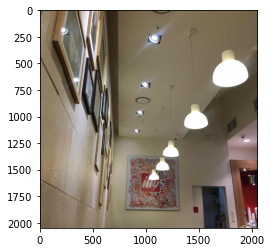

In [33]:
import matplotlib.pyplot as plt

print(rev)
plt.imshow(img)
plt.show()

In [34]:
resNet = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [56]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [57]:
train_data = CaptionDataset('/content/data', review, transform=transform)

In [58]:
img, rev = train_data[0]

In [59]:
img.shape

torch.Size([3, 224, 224])

In [60]:
rev.shape

torch.Size([14, 128])

In [65]:
result = resNet(img.unsqueeze(0))
result.shape

torch.Size([1, 1000])

In [67]:
kor2vec.embedding("깔끔한", seq_len = 10)

tensor([[ 0.5900,  0.2652, -0.1624,  ..., -0.1335, -0.1971, -0.0667],
        [-0.1898, -0.1596, -0.1624,  ..., -0.0354,  0.0508,  0.0099],
        [-0.1898, -0.1596, -0.1624,  ..., -0.0354,  0.0508,  0.0099],
        ...,
        [-0.1898, -0.1596, -0.1624,  ..., -0.0354,  0.0508,  0.0099],
        [-0.1898, -0.1596, -0.1624,  ..., -0.0354,  0.0508,  0.0099],
        [-0.1898, -0.1596, -0.1624,  ..., -0.0354,  0.0508,  0.0099]],
       grad_fn=<CatBackward>)